In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB 
from sklearn.cross_validation import train_test_split
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [61]:
rawData=pd.read_table('C:/Users/lbisht/Documents/Thinkful/Data1/ideal-weight/ideal_weight.csv',
                     sep=',')
print(rawData.head())

   'id'     'sex'  'actual'  'ideal'  'diff'
0     0    'Male'       215      190      25
1     1  'Female'       155      135      20
2     2    'Male'       195      155      40
3     3  'Female'       145      130      15
4     4  'Female'       110      100      10


In [62]:
#remove single quotes
lambdafn=lambda x: str(x).replace("'", "")
rawData.columns=list(map(lambdafn, rawData.columns))

In [41]:
print(rawData.columns)

Index(['id', 'sex', 'actual', 'ideal', 'diff'], dtype='object')


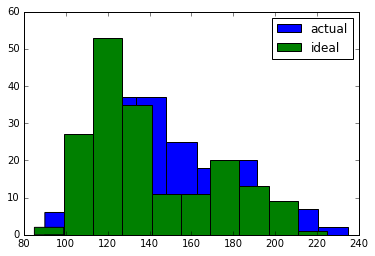

In [63]:
plt.hist(rawData.actual, label='actual')
plt.hist(rawData.ideal, label='ideal')
plt.legend()
plt.show()


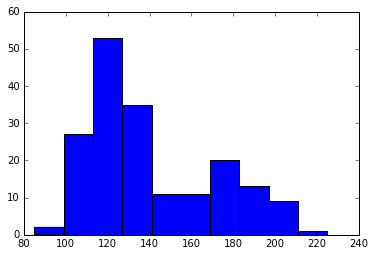

In [43]:
plt.hist(rawData.ideal, label='diff')
plt.show()

0    190
1    135
2    155
3    130
4    100
Name: weightDiff, dtype: int64


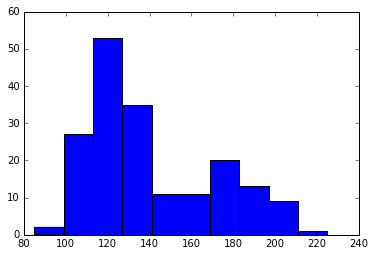

In [34]:
#rawData['weightDiff']=rawData['actual']=rawData['ideal']
#print(rawData['weightDiff'].head()) 
#plt.hist(rawData['weightDiff'], label='weightDiff')
#plt.show()

In [64]:
rawData.sex=rawData.sex.astype('category')
print((rawData.sex.dtype))
print(rawData.sex.value_counts())# more famales then males



category
'Female'    119
'Male'       63
dtype: int64


In [106]:
y=rawData.pop('sex')
rawData.pop('id')


In [107]:
print(y.dtype)
print(rawData.head())

category
   actual  ideal  diff
0     215    190    25
1     155    135    20
2     195    155    40
3     145    130    15
4     110    100    10


In [108]:
x_train,x_test,y_train,y_test=train_test_split(rawData, y, test_size=0.33)

In [110]:
print(len(x_train));print(len(x_test));print(len(rawData));


121
61
182


In [116]:
classifier_nb=GaussianNB()
model=classifier_nb.fit(x_train,y_train)
y_predict_test=model.predict(x_test)
#print( (y_test !=y_predict_test).sum())
#print(len(x_test))
#print(y_predict_test)
print ("number of mislabeled points out of a total {} points: {}".format(x_test.shape[0], (y_test !=y_predict_test).sum()))
model.predict(pd.DataFrame([{'actual':145, 'ideal':160,'diff':-15}]))


number of mislabeled points out of a total 61 points: 4


array(["'Male'"], 
      dtype='<U8')